In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
from distmetrics import compute_mahalonobis_dist_2d, get_asf_rtc_burst_ts, read_asf_rtc_image_data, despeckle_rtc_arrs_with_tv
import matplotlib.pyplot as plt
from rasterio.plot import show
import numpy as np
from scipy.special import expit, logit
from distmetrics import load_trained_transformer_model, compute_transformer_zscore


References:

- CNN story: https://www.cnn.com/2024/05/25/world/video/damage-papua-new-guinea-landslide-ldn-digvid
- ASF Search: https://search.asf.alaska.edu/#/?polygon=POINT(143.3641%20-5.3821)&zoom=13.000&center=143.364,-5.425&resultsLoaded=true&granule=OPERA_L2_RTC-S1_T009-019294-IW2_20240603T084748Z_20240603T133726Z_S1A_30_v1.0&maxResults=250&dataset=OPERA-S1&productTypes=RTC

In [4]:
BURST_ID = 'T009_019294_IW2'

In [5]:
df_rtc_ts = get_asf_rtc_burst_ts(BURST_ID)
print('# of results: ', df_rtc_ts.shape[0])
df_rtc_ts.head()

# of results:  28


,opera_id,acq_datetime,polarization,url_vh,url_vv,track_number,geometry,dedup_id
0,OPERA_L2_RTC-S1_T009-019294-IW2_20231007T08475...,2023-10-07 08:47:51+00:00,VV+VH,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,9,"POLYGON ((143.32562 -5.40839, 143.3687 -5.3988...",OPERA_L2_RTC-S1_T009-019294-IW2_20231007T084751Z
1,OPERA_L2_RTC-S1_T009-019294-IW2_20231019T08475...,2023-10-19 08:47:51+00:00,VV+VH,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,9,"POLYGON ((143.32543 -5.40847, 143.36851 -5.398...",OPERA_L2_RTC-S1_T009-019294-IW2_20231019T084751Z
2,OPERA_L2_RTC-S1_T009-019294-IW2_20231031T08475...,2023-10-31 08:47:51+00:00,VV+VH,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,9,"POLYGON ((143.32647 -5.40917, 144.11392 -5.234...",OPERA_L2_RTC-S1_T009-019294-IW2_20231031T084751Z
3,OPERA_L2_RTC-S1_T009-019294-IW2_20231112T08475...,2023-11-12 08:47:51+00:00,VV+VH,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,9,"POLYGON ((143.32594 -5.40897, 144.11342 -5.234...",OPERA_L2_RTC-S1_T009-019294-IW2_20231112T084751Z
4,OPERA_L2_RTC-S1_T009-019294-IW2_20231124T08475...,2023-11-24 08:47:50+00:00,VV+VH,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,https://datapool.asf.alaska.edu/RTC/OPERA-S1/O...,9,"POLYGON ((143.32749 -5.40822, 144.11495 -5.233...",OPERA_L2_RTC-S1_T009-019294-IW2_20231124T084750Z


**Warning**: sometime this cell fails and must be re-run due to a transient server error.

In [6]:
arrs_vv, profiles = read_asf_rtc_image_data(df_rtc_ts.url_vv.tolist())
arrs_vh, _ = read_asf_rtc_image_data(df_rtc_ts.url_vh.tolist())

Loading RTC data: 100%|████████████████████████| 28/28 [00:23<00:00,  1.21it/s]


In [7]:
arrs_vv_d = despeckle_rtc_arrs_with_tv(arrs_vv)
arrs_vh_d = despeckle_rtc_arrs_with_tv(arrs_vh)

100%|██████████████████████████████████████████| 28/28 [00:07<00:00,  5.11it/s]


In [8]:
for k, date in enumerate(df_rtc_ts.acq_datetime):
    print(k, date)

0 2023-10-07 08:47:51+00:00
1 2023-10-19 08:47:51+00:00
2 2023-10-31 08:47:51+00:00
3 2023-11-12 08:47:51+00:00
4 2023-11-24 08:47:50+00:00
5 2023-12-06 08:47:50+00:00
6 2023-12-18 08:47:49+00:00
7 2023-12-30 08:47:49+00:00
8 2024-01-11 08:47:48+00:00
9 2024-01-23 08:47:48+00:00
10 2024-02-04 08:47:47+00:00
11 2024-02-16 08:47:47+00:00
12 2024-02-28 08:47:47+00:00
13 2024-03-11 08:47:47+00:00
14 2024-03-23 08:47:48+00:00
15 2024-04-04 08:47:48+00:00
16 2024-04-16 08:47:48+00:00
17 2024-04-28 08:47:49+00:00
18 2024-05-22 08:47:48+00:00
19 2024-06-03 08:47:48+00:00
20 2024-06-15 08:47:48+00:00
21 2024-06-27 08:47:47+00:00
22 2024-07-09 08:47:47+00:00
23 2024-07-21 08:47:46+00:00
24 2024-08-02 08:47:46+00:00
25 2024-08-14 08:47:46+00:00
26 2024-08-26 08:47:46+00:00
27 2024-09-07 08:47:47+00:00


In [9]:
pre_slice = slice(9, 19) # excludes last index
post_index = 19

In [10]:
transformer = load_trained_transformer_model()

/Users/cmarshak/bekaert-team/distmetrics/src/distmetrics/transformer.py:176: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  weights = torch.load(TRANSFORMER_WEIGHTS_PATH, map

In [11]:
pre_imgs_vv = arrs_vv_d[pre_slice]

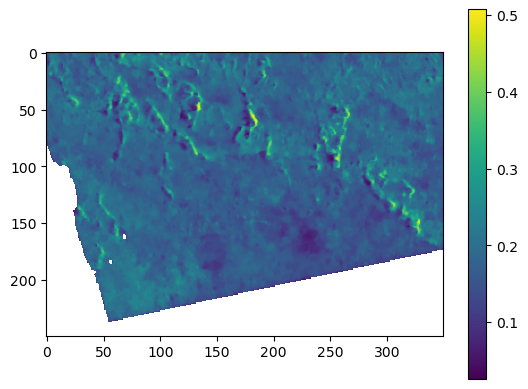

In [12]:
sy = np.s_[1250:1500]
sx = np.s_[400:750]
plt.imshow(pre_imgs_vv[0][sy, sx])
plt.colorbar()

In [13]:
pre_vv_c = [arr[sy, sx] for arr in arrs_vv_d[pre_slice]]
pre_vh_c = [arr[sy, sx] for arr in arrs_vh_d[pre_slice]]

post_vv_c = arrs_vv_d[post_index][sy, sx]
post_vh_c = arrs_vh_d[post_index][sy, sx]

In [15]:
dist_ob = compute_transformer_zscore(transformer, 
                                pre_vv_c,
                                pre_vh_c,
                                post_vv_c,
                                post_vh_c,
                                stride=2,
                                agg='max')

Rows Traversed: 100%|████████████████████████| 118/118 [01:11<00:00,  1.66it/s]


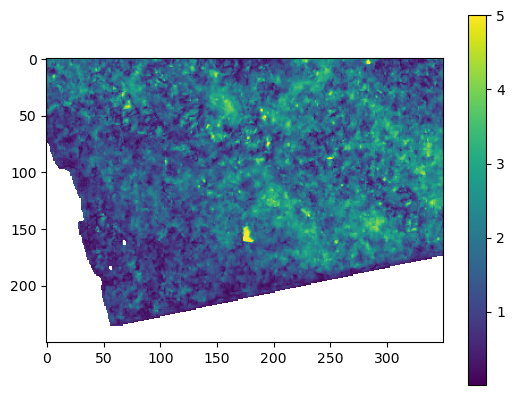

In [16]:
plt.imshow(dist_ob.dist, vmax=5)
plt.colorbar()

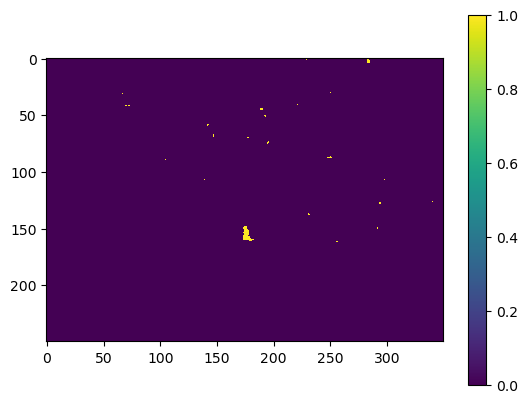

In [17]:
plt.imshow(dist_ob.dist > 4.5, vmax=1, interpolation='none')
plt.colorbar()

**Warninig**: the stat outputs of the function above are in `logits` NOT `gamma naught`. Hence `expit`!

<>:3: SyntaxWarning: invalid escape sequence '\g'
<>:3: SyntaxWarning: invalid escape sequence '\g'
/var/folders/0p/d5x2m4tx5kg1246bplsvyfyh0000gq/T/ipykernel_74734/301655645.py:3: SyntaxWarning: invalid escape sequence '\g'
  plt.title('Mean Estimate VV ($\gamma$)')


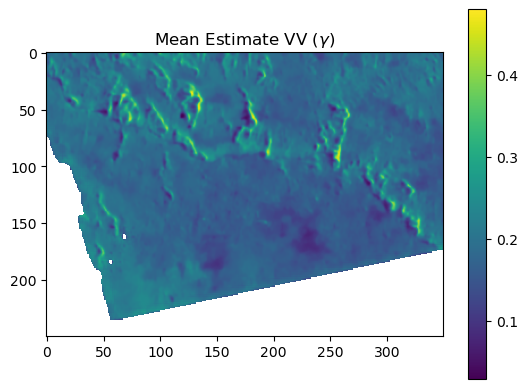

In [18]:
from scipy.special import expit

plt.title('Mean Estimate VV ($\gamma$)')
plt.imshow(expit(dist_ob.mean[0, ...]))
plt.colorbar()

Can't really apply `expit` to `sigma`...

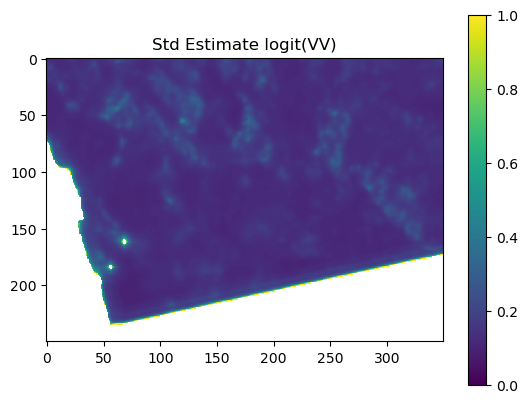

In [19]:
plt.title('Std Estimate logit(VV)')
plt.imshow(dist_ob.std[0, ...], vmax=1, vmin=0)
plt.colorbar()